In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint
from dataclasses import asdict
from lhotse import load_manifest, CutSet, SupervisionSegment, Mfcc, Fbank, Spectrogram

# Loading Switchboard manifests and cutting them into 30s windows

In [3]:
recordings = load_manifest('swbd_manifests/recordings.json')
supervisions = load_manifest('swbd_manifests/supervisions.json.gz')
cs = CutSet.from_manifests(recording_set=recordings, supervision_set=supervisions)
wcs = cs.cut_into_windows(30)

In [4]:
cut = wcs[0]
pprint(asdict(cut))

{'channel': 0,
 'duration': 30,
 'features': None,
 'id': 'df7b3536-2e84-4eae-8498-d995f95ef94c',
 'recording': {'duration_seconds': 252.298375,
               'id': 'sw02001',
               'num_samples': 2018387,
               'sampling_rate': 8000,
               'sources': [{'channel_ids': [0, 1],
                            'source': 'LDC97S62/swb1/sw02001.sph',
                            'type': 'file'}]},
 'start': 0,
 'supervisions': [{'channel_id': 0,
                   'custom': None,
                   'duration': 10.584,
                   'gender': None,
                   'id': 'sw2001A-ms98-a-0002',
                   'language': 'English',
                   'recording_id': 'sw02001',
                   'speaker': 'sw02001A',
                   'start': 0.978,
                   'text': "hi um yeah i'd like to talk about how you dress "
                           'for work and and um what do you normally what type '
                           'of outfit do you normal

# Extracting features from a cut

## Non-persistent (in-memory)

In [5]:
cut.compute_features(Mfcc())

array([[-25.700247  , -30.844233  , -11.411233  , ...,  11.661543  ,
         -0.56268585,  -8.359314  ],
       [-52.71237   , -18.455639  ,  -3.951771  , ...,   6.993956  ,
         -2.0922203 ,   1.8667812 ],
       [-53.161205  , -21.921291  ,  -5.8004885 , ...,  11.242787  ,
          6.020602  ,   2.1714513 ],
       ...,
       [-48.089584  , -30.578722  ,  -2.426938  , ...,  -8.844325  ,
          2.4282563 ,  -0.12705614],
       [-46.752728  , -26.861368  ,  -6.8136244 , ...,   1.590861  ,
         -5.3926997 ,  -8.105945  ],
       [-43.608536  , -30.15674   , -14.442704  , ..., -13.366571  ,
         -1.2388802 ,   4.9489717 ]], dtype=float32)

In [6]:
cut.compute_features(Fbank())

array([[-10.565751 , -10.578902 , -10.685684 , ...,  -2.6556396,
         -2.1166422,  -2.16534  ],
       [-13.99608  , -13.259549 , -11.691491 , ...,  -9.492572 ,
         -9.538118 ,  -9.32652  ],
       [-14.92242  , -14.379782 , -11.796257 , ...,  -9.102584 ,
         -9.315394 ,  -8.454099 ],
       ...,
       [-13.897423 , -13.440627 , -11.963896 , ...,  -7.2953577,
         -7.531963 ,  -7.9829693],
       [-13.588535 , -13.48328  , -12.036619 , ...,  -7.5941625,
         -7.647867 ,  -8.12021  ],
       [-15.942385 , -14.528403 , -11.218311 , ...,  -6.826899 ,
         -7.376161 ,  -8.583842 ]], dtype=float32)

## Persistent (with disk storage, modifies adds feature info to the cut)

In [7]:
cut.compute_and_store_features(Fbank(), 'feats-test')
pprint(asdict(cut))

{'channel': 0,
 'duration': 30,
 'features': {'channels': None,
              'duration': 30.0,
              'num_features': 23,
              'num_frames': 3000,
              'recording_id': None,
              'sampling_rate': 8000,
              'start': 0,
              'storage_path': 'feats-test/storage/24467801-06b9-4784-8f1a-c29478e9e1e7.llc',
              'storage_type': 'lilcom',
              'type': 'fbank'},
 'id': 'df7b3536-2e84-4eae-8498-d995f95ef94c',
 'recording': {'duration_seconds': 252.298375,
               'id': 'sw02001',
               'num_samples': 2018387,
               'sampling_rate': 8000,
               'sources': [{'channel_ids': [0, 1],
                            'source': 'LDC97S62/swb1/sw02001.sph',
                            'type': 'file'}]},
 'start': 0,
 'supervisions': [{'channel_id': 0,
                   'custom': None,
                   'duration': 10.584,
                   'gender': None,
                   'id': 'sw2001A-ms98-a-0002'

# Data exploration - listening to and visualizing audio

In [8]:
cut.play_audio()

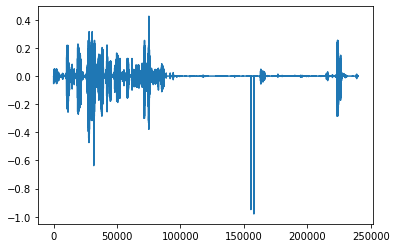

In [9]:
cut.plot_audio()

## Visualizing feature matrices (truncate helps them fit on screen)

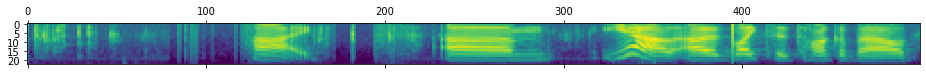

In [10]:
cut.truncate(duration=5).plot_features()

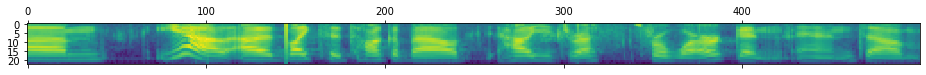

In [11]:
cut.truncate(offset=2.5, duration=5).plot_features()

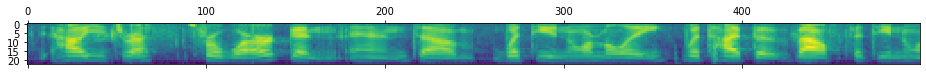

In [12]:
cut.truncate(offset=5, duration=5).plot_features()

# Mixing a cut + visualization

In [13]:
mixed = cut.truncate(duration=5).mix(cut.truncate(offset=2.5, duration=5))
pprint(asdict(mixed))

{'id': 'b1ff2ef6-e6b6-4747-a18d-a07c91c0be24',
 'tracks': [{'cut': {'channel': 0,
                     'duration': 5.0,
                     'features': {'channels': None,
                                  'duration': 30.0,
                                  'num_features': 23,
                                  'num_frames': 3000,
                                  'recording_id': None,
                                  'sampling_rate': 8000,
                                  'start': 0,
                                  'storage_path': 'feats-test/storage/24467801-06b9-4784-8f1a-c29478e9e1e7.llc',
                                  'storage_type': 'lilcom',
                                  'type': 'fbank'},
                     'id': 'b64fb1c7-f230-44b7-b65b-2ff41fc1fcb7',
                     'recording': {'duration_seconds': 252.298375,
                                   'id': 'sw02001',
                                   'num_samples': 2018387,
                                   'sam

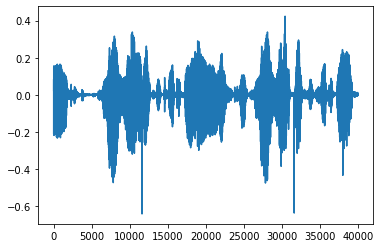

In [14]:
mixed.plot_audio()

In [15]:
mixed.play_audio()

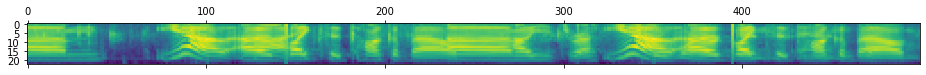

In [16]:
mixed.plot_features()

# Appending two cuts

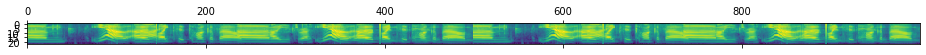

In [17]:
mixed.append(mixed).plot_features()

# Using data augmentation

In [18]:
from lhotse import WavAugmenter
augmenter = WavAugmenter.create_predefined('pitch_reverb_tdrop', sampling_rate=8000)

## Several extraction runs (augmenter has randomness)

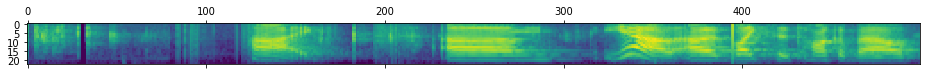

In [19]:
cut.truncate(duration=5).compute_and_store_features(Fbank(), 'feats-test', augmenter=augmenter).plot_features()

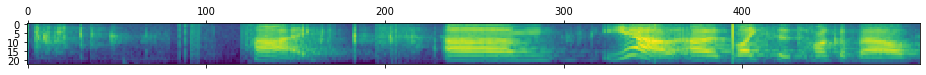

In [20]:
cut.truncate(duration=5).compute_and_store_features(Fbank(), 'feats-test', augmenter=augmenter).plot_features()

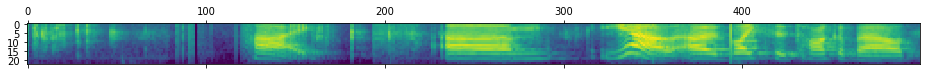

In [21]:
cut.truncate(duration=5).compute_and_store_features(Fbank(), 'feats-test', augmenter=augmenter).plot_features()

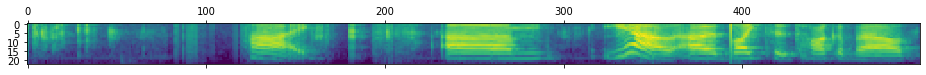

In [22]:
cut.truncate(duration=5).compute_and_store_features(Fbank(), 'feats-test', augmenter=augmenter).plot_features()

# Batch operation - extract features for the whole CutSet

In [23]:
from itertools import islice
small_cs = CutSet.from_cuts(list(islice(wcs, 100)))

In [24]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(4) as ex:
    csf = small_cs.compute_and_store_features(
        extractor=Fbank(),
        output_dir='swbd-feats',
        augmenter=augmenter,
        executor=ex
    )

In [25]:
csf[0].features

Features(type='fbank', num_frames=3000, num_features=23, sampling_rate=8000, storage_type='lilcom', storage_path='swbd-feats/storage/e8bc0fc3-08a2-4d3d-b6da-539d85cc5b6f.llc', start=0, duration=30.0, recording_id=None, channels=None)

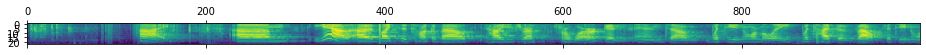

In [26]:
csf[0].truncate(duration=10).plot_features()

In [28]:
csf[1].features

Features(type='fbank', num_frames=3000, num_features=23, sampling_rate=8000, storage_type='lilcom', storage_path='swbd-feats/storage/1bc9eb7c-9aa3-47a3-81b5-06c4cc08e9ef.llc', start=30, duration=30.0, recording_id=None, channels=None)

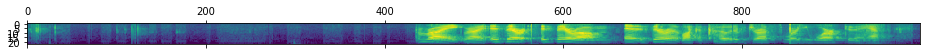

In [29]:
csf[1].truncate(duration=10).plot_features()